用Python编写代码实现两个同心圆，每个圆表示不同的分类，假设外圆为正类，内圆为负类

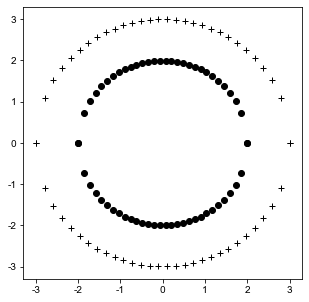

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import matplotlib
warnings.filterwarnings('ignore')
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'
x_list, y_list, type_list = [], [], []
plt.figure(figsize=(5,5))
for e in [(2,'o',False),(3,'+',True)]:
    r, symbol, flag = e
    x = np.linspace(-r,r,30)
    y1 = np.sqrt(r**2-x**2)
    y2 = -y1
    x_list = x_list + x.tolist() + x.tolist()
    y_list = y_list + y1.tolist() + y2.tolist()
    type_list = type_list + [flag]*(2*len(x))
    plt.plot(x,y1,symbol,x,y2,symbol,color='black')
vdata = pd.DataFrame({'x': x_list, 'y': y_list, 'type': type_list})
plt.show()

查看vdata的前几行

In [2]:
vdata.head()

,x,y,type
0,-2.000000,0.000000,False
1,-1.862069,0.729862,False
2,-1.724138,1.013582,False
3,-1.586207,1.218174,False
4,-1.448276,1.379310,False


现在尝试用逻辑回归算法建立分类模型，以正确地识别出这两类

In [3]:
from sklearn.linear_model.logistic import LogisticRegression  
from sklearn.metrics import confusion_matrix
tm = LogisticRegression(solver='lbfgs') 
X,y = vdata.drop(columns=['type']),vdata.type
tm.fit(X,y)
y_pred = tm.predict(X)
confusion_matrix(y, y_pred)

array([[60,  0],
       [60,  0]])

对X和y分别构建最高3阶的特征，并基于新特征集，建立模型，并分析预测效果

In [4]:
# 设置阶数为2和3阶
for i in [2,3]:
    vdata['x'+str(i)]=vdata.x**i
    vdata['y'+str(i)]=vdata.y**i
X,y = vdata.drop(columns=['type']),vdata.type
tm.fit(X,y)
y_pred = tm.predict(X)
confusion_matrix(y, y_pred)

array([[60,  0],
       [ 0, 60]])

查看逻辑回归拟合的系数

In [5]:
coef = np.round(tm.coef_,2)[0]
coef

array([-0.  , -0.  ,  1.73,  1.8 , -0.  ,  0.  ])

如结果所示，只有两个预测变量起着主要作用，可使用如下代码查看具体变量

In [6]:
X.columns[np.where(coef > 0)]

Index(['x2', 'y2'], dtype='object')

以x2为横轴，以y2为纵轴将新特征绘制在二维坐标平面

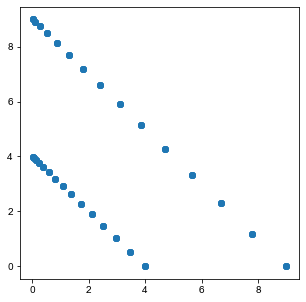

In [7]:
plt.figure(figsize=(5,5))
plt.plot(vdata.x2,vdata.y2,'o')
plt.show()